In [345]:
import pandas as pd
import numpy as np
import matplotlib
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [346]:
data = read_csv('training.csv', ',', parse_dates=['Date'], dayfirst=True)
data.head()

,Date,Value
0,1959-01-01,22.8331
1,1959-02-01,23.2802
2,1959-03-01,23.6156
3,1959-04-01,24.1186
4,1959-05-01,24.4820


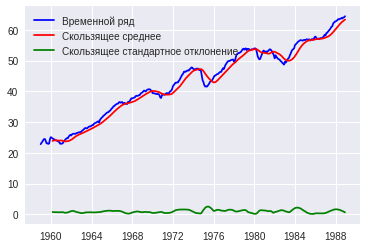

In [347]:
y = pd.Series(np.asarray(data['Value']))
plt.plot(data.Date, data.Value, 'b', label = 'Временной ряд')
plt.plot(data.Date, y.rolling(window=15).mean(), 'r', label = 'Скользящее среднее')
plt.plot(data.Date, y.rolling(window=15).std(), 'g', label = 'Скользящее стандартное отклонение')
plt.legend(loc='upper left')
plt.show()

Как можно заметить, график временного ряда не имеет ярких выбросов и имеет ярко выраженный тренд.
Из это можно сделать вывод о том, что ряд не является стационарным.

In [348]:
data.describe()


,Value
count,360.000000
mean,43.347284
std,11.445942
min,22.833100
25%,35.843875
50%,44.769500
75%,52.962875
max,64.421000


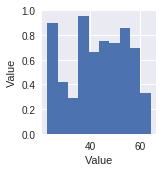

In [349]:
sns.pairplot(data)

# Тест Дики-Фуллера

In [350]:
def DF(y):
    test = sm.tsa.adfuller(y)
    print ('adf: ', test[0])
    print ('p-value: ', test[1])
    print ('Critical values: ', test[4])
    print ('Вывод: ')
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен\n')
        return False
    else:
        print ('единичных корней нет, ряд стационарен\n')
        return True
DF(y)

adf:  -0.253391179928
p-value:  0.931851042299
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459002}
Вывод: 
есть единичные корни, ряд не стационарен



False

In [351]:
data = data.set_index('Date')

In [352]:
def decomposition(data, modelka, title):
    decomp = seasonal_decompose(data.Value, model=modelka)
    plt.plot(decomp.trend, 'b', label = 'Тренд')
    plt.plot(decomp.seasonal, 'r', label = 'Сезональность')
    plt.plot(decomp.resid, 'g', label = 'Остаток')
    plt.legend(loc='upper left')
    plt.show()

    print('Проверка тренда на стационарность')
    plt.plot(decomp.trend)
    plt.show()
    t = decomp.trend
    t.dropna(inplace=True)
    DF(t)
    
    print('Проверка сезональности на стационарность')
    plt.plot(decomp.seasonal)
    plt.show()
    t = decomp.seasonal
    t.dropna(inplace=True)
    DF(t)
    
    print('Проверка остатка на стационарность')
    plt.plot(decomp.resid)
    plt.show()
    t = decomp.resid
    t.dropna(inplace=True)
    DF(t)

# Аддитивная модель

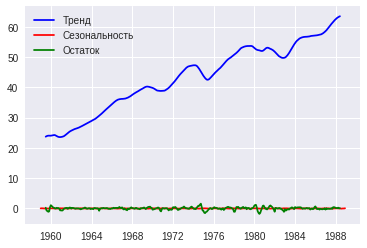

Проверка тренда на стационарность


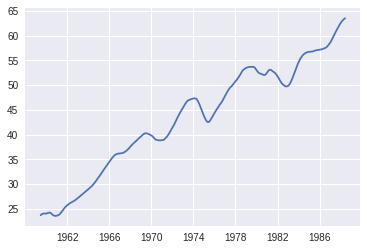

adf:  -0.861576033358
p-value:  0.800362576153
Critical values:  {'1%': -3.4503224123605194, '5%': -2.8703384787266608, '10%': -2.5714576124885218}
Вывод: 
есть единичные корни, ряд не стационарен

Проверка сезональности на стационарность


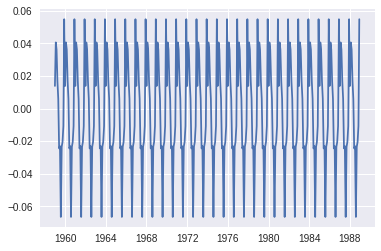

adf:  -1.45267497959e+14
p-value:  0.0
Critical values:  {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}
Вывод: 
единичных корней нет, ряд стационарен

Проверка остатка на стационарность


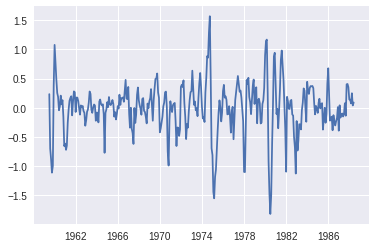

adf:  -7.48556383377
p-value:  4.64909667469e-11
Critical values:  {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
Вывод: 
единичных корней нет, ряд стационарен



In [353]:

decomposition(data, 'additive', 'Аддитивная модель')

# Мультипликативная модель

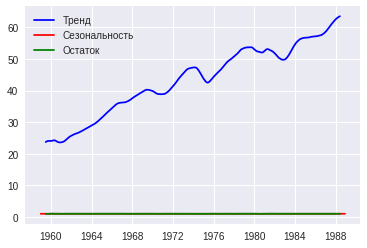

Проверка тренда на стационарность


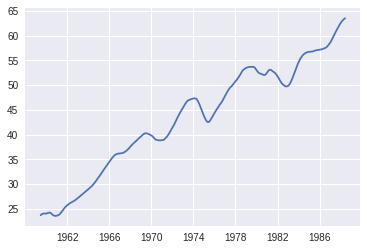

adf:  -0.861576033358
p-value:  0.800362576153
Critical values:  {'1%': -3.4503224123605194, '5%': -2.8703384787266608, '10%': -2.5714576124885218}
Вывод: 
есть единичные корни, ряд не стационарен

Проверка сезональности на стационарность


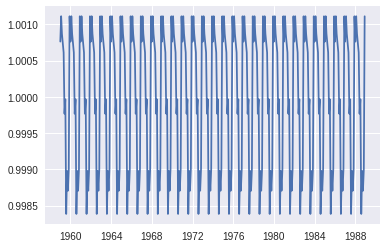

adf:  -5.34031526959e+13
p-value:  0.0
Critical values:  {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
Вывод: 
единичных корней нет, ряд стационарен

Проверка остатка на стационарность


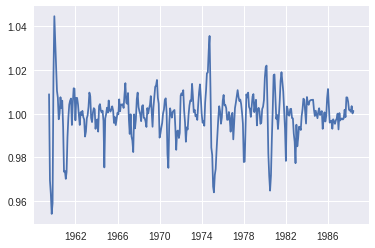

adf:  -7.46608373979
p-value:  5.20019389833e-11
Critical values:  {'1%': -3.4496162602188187, '5%': -2.870028369720798, '10%': -2.5712922615505627}
Вывод: 
единичных корней нет, ряд стационарен



In [354]:
decomposition(data, 'multiplicate', 'Мультипликативная модель')

# Нахождение порядка интегрированности ряда

In [355]:
order = 0
test = y
while (not DF(test)):
    test = test.diff().dropna()
    order += 1

print('порядок интегрированности: ', order)

adf:  -0.253391179928
p-value:  0.931851042299
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459002}
Вывод: 
есть единичные корни, ряд не стационарен

adf:  -7.36731149521
p-value:  9.1641495611e-11
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459002}
Вывод: 
единичных корней нет, ряд стационарен

порядок интегрированности:  1



# Нахождение необходимых параметров для модели ARIMA

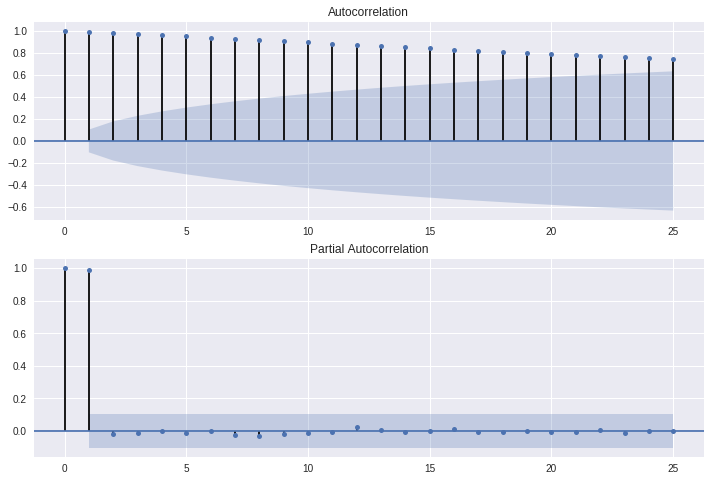

In [356]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=25, ax=ax2)

После изучения коррелограммы PACF можно сделать вывод, что p = 2, т.к. 2 лага

In [357]:
p = 1
d = 1
q = 1

# Модель ARIMA

In [358]:
model = ARIMA(data, order=(p, d, q))  # Применяем модель ARIMA

In [359]:
model = model.fit()  # тренирует модель на фиксированном наборе данных

# Предсказание

In [360]:
data_test = read_csv('testing.csv', ',', parse_dates=['Date'], dayfirst=True)
predictions = model.predict(start='1989-01-01', end='1993-12-01', typ='levels', dynamic=True)

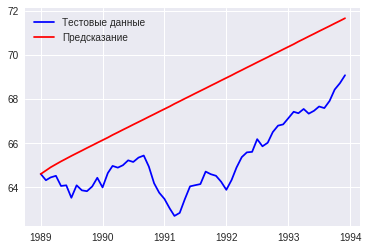

In [361]:
plt.plot(data_test.Date, data_test.Value, 'b', label = 'Тестовые данные')
plt.plot(data_test.Date, predictions, 'r', label = 'Предсказание')
plt.legend(loc='upper left')
plt.show()

In [362]:
r2 = r2_score(data_test['Value'], predictions)
print(r2)
print("AIC =", model.aic)

-3.28133813911
AIC = 248.73365724475093


# Модель SARIMAX

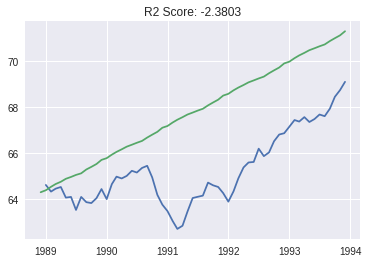

AIC= 290.425628711


In [363]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

data_test = pd.read_csv('training.csv', parse_dates=['Date'],
                   index_col='Date')
model = SARIMAX(data, order=(p, d, q),
                seasonal_order=(p, d, q, 12))  
model_res = model.fit()

data2 = pd.read_csv('testing.csv', parse_dates=['Date'], index_col='Date')

ts = data2['Value']
predictions = model_res.predict(start='1988-12-01', end='1993-12-01',
                                dynamic=True)
plt.plot(ts)
plt.plot(predictions)
plt.title('R2 Score: %.4f' % r2_score(ts, predictions['1989-01-01':]))
plt.show()
print("AIC=", model_res.aic)